diabetes predictions

In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [206]:
df= pd.read_csv("/content/drive/MyDrive/csv files/diabetes.csv")  ### reading the file

In [207]:
##### checking first five rows

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [208]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [209]:
#### first checking the null values

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [210]:
df.shape

(768, 9)

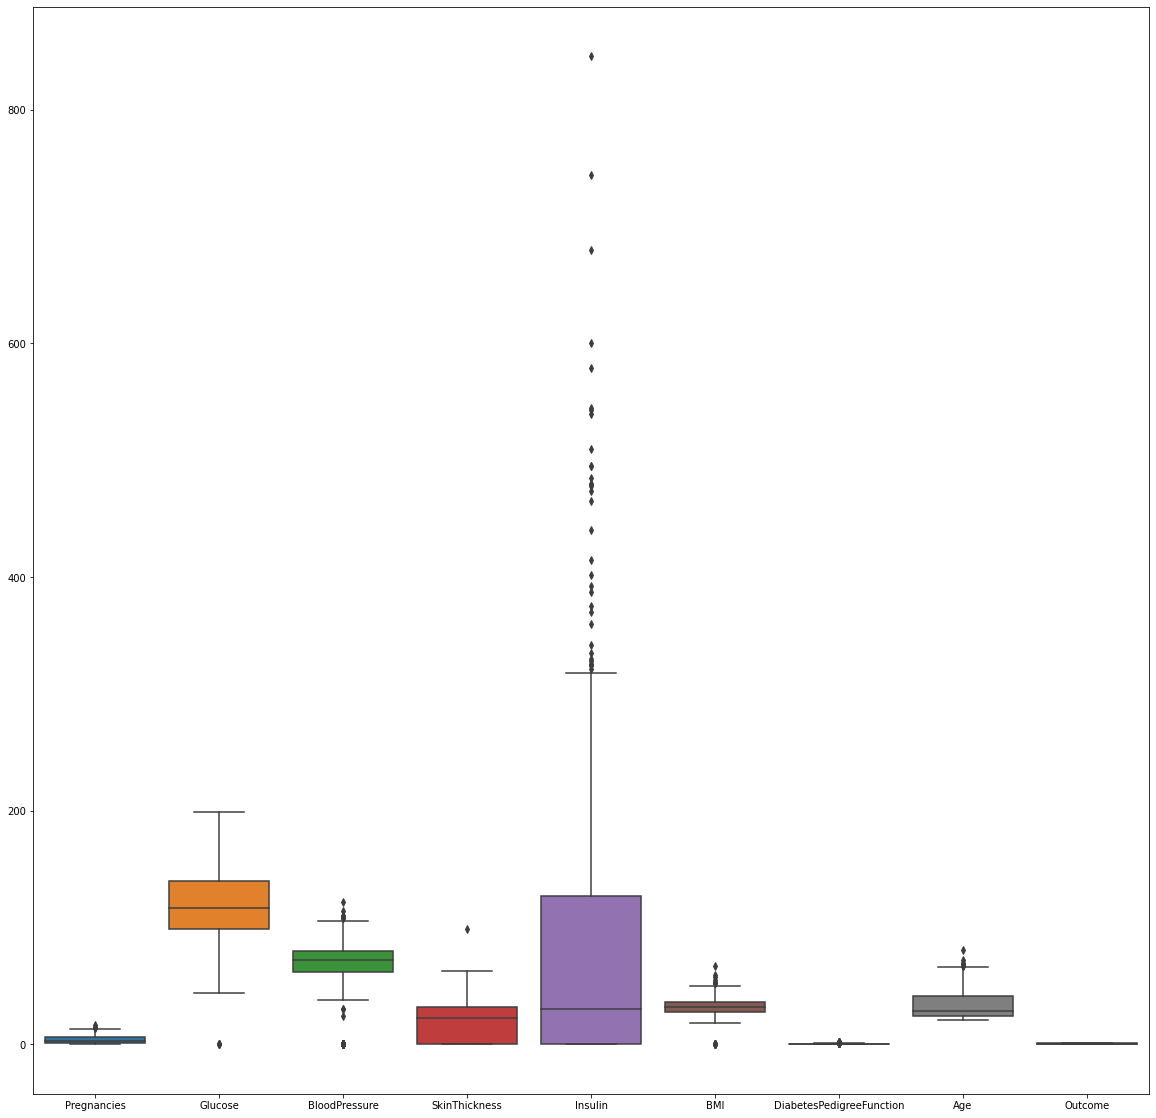

In [211]:
plt.figure(figsize=(20,20))
sns.boxplot(data=df)

####checking out the outliers by box plot


In [212]:
### we removed the outliers here

df=df[df["SkinThickness"]<80]
df=df[df["Insulin"]<=600]

In [213]:
df.shape       ##### 4 rows got deleted by removing outliers

(764, 9)

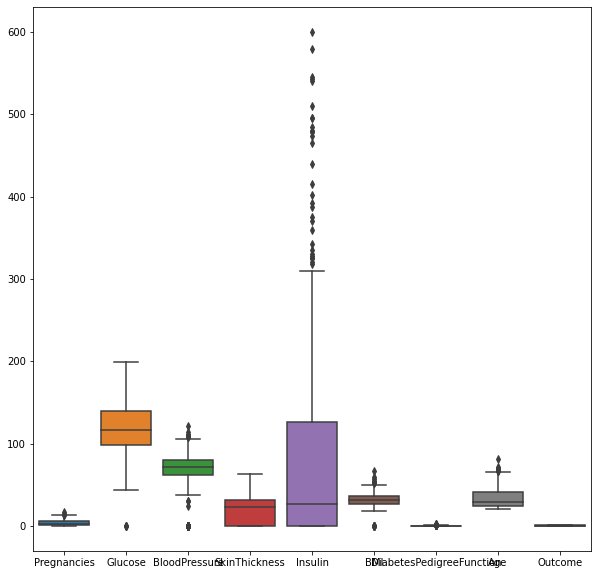

In [214]:
plt.figure(figsize=(10,10))
sns.boxplot(data=df)

In [215]:
### to find out the correlation between features

df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.137261,0.142749,-0.078336,-0.063876,0.021608,-0.034837,0.552249,0.224378
Glucose,0.137261,1.000000,0.153595,0.037620,0.313277,0.217700,0.123758,0.256883,0.469070
BloodPressure,0.142749,0.153595,1.000000,0.209797,0.091987,0.279536,0.041865,0.244027,0.067167
SkinThickness,-0.078336,0.037620,0.209797,1.000000,0.466379,0.395501,0.180394,-0.132228,0.068960
Insulin,-0.063876,0.313277,0.091987,0.466379,1.000000,0.192752,0.160463,-0.056092,0.140820
BMI,0.021608,0.217700,0.279536,0.395501,0.192752,1.000000,0.140059,0.039367,0.297857
DiabetesPedigreeFunction,-0.034837,0.123758,0.041865,0.180394,0.160463,0.140059,1.000000,0.035411,0.183273
Age,0.552249,0.256883,0.244027,-0.132228,-0.056092,0.039367,0.035411,1.000000,0.231562
Outcome,0.224378,0.469070,0.067167,0.068960,0.140820,0.297857,0.183273,0.231562,1.000000


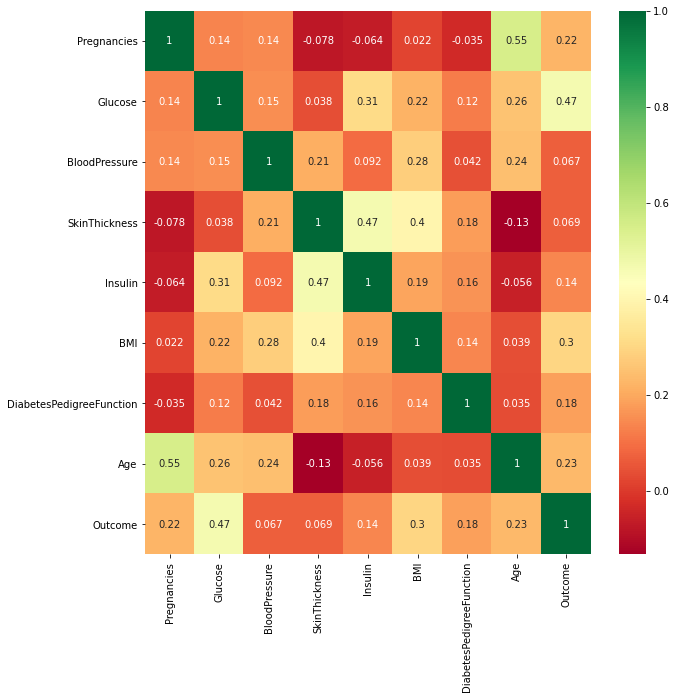

In [216]:
### finding the correlation between features

plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,cmap="RdYlGn")

In [217]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [218]:
df["Insulin"].value_counts()    ##### here we can replace 0 with mean of that column


0      373
105     11
140      9
130      9
120      8
      ... 
270      1
258      1
255      1
108      1
600      1
Name: Insulin, Length: 183, dtype: int64

In [219]:
df["Insulin"].mean()

77.24607329842932

In [220]:
df["Insulin"]=df["Insulin"].replace(0,77.24)         #### 0 replaced with mean of insulin column

In [221]:
df["Insulin"].value_counts() 

77.24     373
105.00     11
130.00      9
140.00      9
120.00      8
         ... 
272.00      1
41.00       1
25.00       1
600.00      1
81.00       1
Name: Insulin, Length: 183, dtype: int64

In [222]:
df["SkinThickness"].mean()

20.39005235602094

In [223]:
df["SkinThickness"]=df["SkinThickness"].replace(0,20.390)

In [224]:
df["BloodPressure"].mean()

69.08769633507853

In [225]:
df["BloodPressure"]=df["BloodPressure"].replace(0,69.08)

In [226]:
df["BMI"].mean()

31.958769633507835

In [227]:
df["BMI"]=df["BMI"].replace(0,32)

In [228]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72.00,35.00,77.24,33.6,0.627,50,1
1,1,85,66.00,29.00,77.24,26.6,0.351,31,0
2,8,183,64.00,20.39,77.24,23.3,0.672,32,1
3,1,89,66.00,23.00,94.00,28.1,0.167,21,0
4,0,137,40.00,35.00,168.00,43.1,2.288,33,1
5,5,116,74.00,20.39,77.24,25.6,0.201,30,0
6,3,78,50.00,32.00,88.00,31.0,0.248,26,1
7,10,115,69.08,20.39,77.24,35.3,0.134,29,0
8,2,197,70.00,45.00,543.00,30.5,0.158,53,1
9,8,125,96.00,20.39,77.24,32.0,0.232,54,1


In [229]:
#### now its time to do feature scaling
###we will do normalization  ( min max scaler)

from sklearn.preprocessing import MinMaxScaler


In [230]:
scaling=MinMaxScaler()
df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome","Pregnancies"]]=scaling.fit_transform(df[["Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome","Pregnancies"]])

In [231]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.489796,0.500000,0.107918,0.314928,0.234415,0.483333,1.0
1,0.058824,0.427136,0.428571,0.392857,0.107918,0.171779,0.116567,0.166667,0.0
2,0.470588,0.919598,0.408163,0.239107,0.107918,0.104294,0.253629,0.183333,1.0
3,0.058824,0.447236,0.428571,0.285714,0.136519,0.202454,0.038002,0.000000,0.0
4,0.000000,0.688442,0.163265,0.500000,0.262799,0.509202,0.943638,0.200000,1.0
5,0.294118,0.582915,0.510204,0.239107,0.107918,0.151329,0.052519,0.150000,0.0
6,0.176471,0.391960,0.265306,0.446429,0.126280,0.261759,0.072588,0.083333,1.0
7,0.588235,0.577889,0.460000,0.239107,0.107918,0.349693,0.023911,0.133333,0.0
8,0.117647,0.989950,0.469388,0.678571,0.902730,0.251534,0.034159,0.533333,1.0
9,0.470588,0.628141,0.734694,0.239107,0.107918,0.282209,0.065756,0.550000,1.0


In [232]:
X=df.iloc[:,0:8]    #### dividing the data into dependent and independent variable
y=df.iloc[:,-1]

In [233]:
X.shape,y.shape

((764, 8), (764,))

In [234]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.489796,0.500000,0.107918,0.314928,0.234415,0.483333
1,0.058824,0.427136,0.428571,0.392857,0.107918,0.171779,0.116567,0.166667
2,0.470588,0.919598,0.408163,0.239107,0.107918,0.104294,0.253629,0.183333
3,0.058824,0.447236,0.428571,0.285714,0.136519,0.202454,0.038002,0.000000
4,0.000000,0.688442,0.163265,0.500000,0.262799,0.509202,0.943638,0.200000


In [235]:
y.head()

0    1.0
1    0.0
2    1.0
3    0.0
4    1.0
Name: Outcome, dtype: float64

In [236]:
#### dividing the data into train and test set

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.2,random_state=42)

In [237]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((611, 8), (153, 8), (611,), (153,))

In [238]:
#### importing Logistic regression

from sklearn.linear_model import LogisticRegression

In [239]:
leg=LogisticRegression()


In [240]:
leg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [241]:
y_pred=leg.predict(X_test)

In [242]:
y_pred


array([1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.,
       0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 1.,
       0., 0., 1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1.,
       1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0.])

In [243]:
from sklearn.metrics import accuracy_score

In [244]:
accuracy_score(y_test,y_pred)

0.8169934640522876

In [245]:
pd.crosstab(y_test,y_pred)

col_0,0.0,1.0
Outcome,,
0.0,97,9
1.0,19,28
